# LGP: the Lorenz-Gini-P curve


## A Lorenz Curve is a scatter plot of two series of cumulative proportions:
The x-axis records the cumulative proportion of some population (people, rabbits, defective widgets etc.) 
ranked by the cummulative proportion of an associated y-measure (income, births, cost of repairs, etc.).  
It is therefore, a square plot with (0,1) ranges.

To reproduce the "augmented" Lorenz curve (Figure 2) in this paper by Kunegis and Preusse, "Fairness on the Web: Alternatives to the Power Law" in *WebSci* 2012, June 22–24, 2012, Evanston, Illinois, USA::  

![Figure2](../images/LorenzGiniP_Figure2.png)
> Figure 2. Statistics associated with the Pareto principle. [...]The Lorenz curve (continuous line) gives rise to two statistics: The Gini coefficient G is twice the gray area and the balanced inequality ratio P is the point at which the antidiagonal crosses the Lorenz curve.


The 'the balanced inequality ratio P' that Kunegis and Preusse identify is typically used in a statement echoing the Pareto principle, e.g.: P% of all <users/objects> account for X% of all <some measures/resources...>.

# The Gini coefficient:  

## The Gini coefficient can be obtained graphically:  
The area below the diagonal is equal to half the total area of the square;  
It is also equal to the area between the diagonal and the Lorenz curve = A, 
plus what's left = B.  
Therefore, the Gini coefficient, G is:  G = A/(A+B)   
Since A+B = 0.5, **G = 2A**

# Imports for first notebook/labook cell:

In [1]:
# %load nb_cell0.py
import os
import sys

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)

from pprint import pprint as pp
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('Python: {}\n'.format(sys.version))
print('Currrent dir:', os.path.abspath(os.path.curdir))

def add_to_sys_path(this_path, up=False):
    """
    Prepend this_path to sys.path.
    If up=True, path refers to parent folder (1 level up).
    """
    for p in sys.path:
        p = os.path.abspath(p)
    if up:
        newp = os.path.abspath(os.path.join(this_path, '..'))
    else:
        newp = os.path.abspath(this_path)
        
    if this_path not in (p, p + os.sep):
        print('Path added to sys.path: {}'.format(newp))
        sys.path.insert(0, newp)
        
# if notebook inside another folder, eg ./notebooks:
up =  os.path.abspath(os.path.curdir).endswith('notebooks')
add_to_sys_path(os.path.curdir, up)


def is_lab_notebook():
    import re
    import psutil
        
    return any(re.search('jupyter-lab-script', x)
               for x in psutil.Process().parent().cmdline())

if is_lab_notebook():
    # need to use Markdown if referencing variables:
    from IPython.display import Markdown, HTML
    msg = "This is a JupyterLab notebook: Use `IPython.display.\
           Markdown()` if referencing variables in a Markdown cell."
    return Markdown('### {}'.format(msg))


Python: 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]

Currrent dir: C:\Users\catch\Documents\GitHub\Lorenz_Gini_P_curve\notebooks
Path added to sys.path: C:\Users\catch\Documents\GitHub\Lorenz_Gini_P_curve


### This is a JupyterLab notebook: Use `IPython.display.                   Markdown()` if referencing variables in a Markdown cell.

In [2]:
%load_ext autoreload
%autoreload 2

# Local import (this project module)

In [3]:
from lgp_curve import LorenzGiniP as LGP

# Global var for the images folder:
IMG = LGP.DIR_IMG

# Example 1:  
## A perfectly distributed population with regard to y_measure='leisure expenditures':

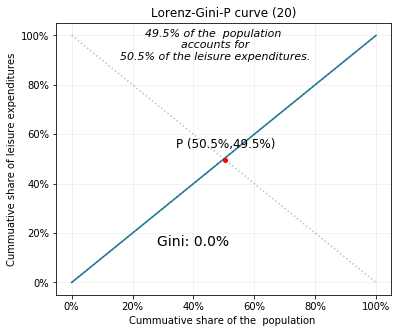

In [4]:
# Example w/o pandas; x and y have the same size:

N = 20

x = np.ones(N); x[0] = 0
xlor = x.cumsum()/x.sum()

y0 = x
ylor = y0.cumsum()/y0.sum()

fname = os.path.join(IMG, 'Lorenz_Gini0.png')

LGP.plot_lorenz_GP(xlor, ylor,
                   y_measure='leisure expenditures',
                   save_as=fname)

# Example 2: 
## A totally unperfectly distributed population of x_measure='crop patches' with regard to y_measure='grain yield':

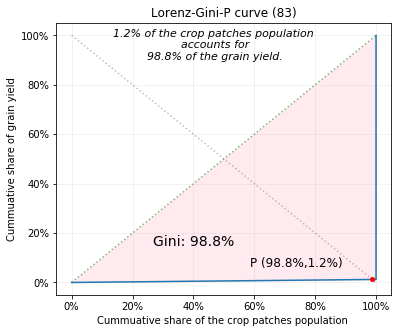

In [5]:
N = 83

x = np.ones(N); x[0] = 0
xlor = x 

y0 = x
ylor = y0.cumsum()/y0.sum()

fname = os.path.join(IMG, 'Lorenz_Gini100.png')

LGP.plot_lorenz_GP(xlor, ylor,
                   x_measure='crop patches',
                   y_measure = 'grain yield',
                   save_as=fname)

# Example 3: 
## A somehwat unperfectly distributed population with regard to y_measure='vacation days taken':

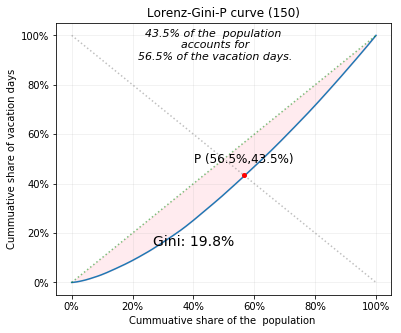

In [6]:
N = 150

# create series with 0 as 1st value:
x0 = np.zeros(N)
x0[1:] = np.random.random(N-1) * 100
x0.sort()

y0 = np.zeros(N)
# define y0 as a function of x0;
# no need to sort, bc x0 is
y0[1:] = np.power(x0[1:], 2)

# lorenz curve ranges:
xlor = x0.cumsum()/x0.sum()
ylor = y0.cumsum()/y0.sum()

# Name w/o extension: 'png' (default) is added:
fname = os.path.join(IMG, 'Lorenz_Gini')

LGP.plot_lorenz_GP(xlor, ylor,
                   y_measure='vacation days',
                   save_as=fname)

# Example 4: Pandas
Synthetic income distribution data of size N.  
Given a pair of series (pop_pct, inc_pct), listing the percentage of a population with its respective total income percentage, the Lorenz curve is obtain with the following steps:  
1. For sorting purposes, add a column for pct_income/pct_pop
2. sort
3. accumulate both pop_pct, inc_pct columns

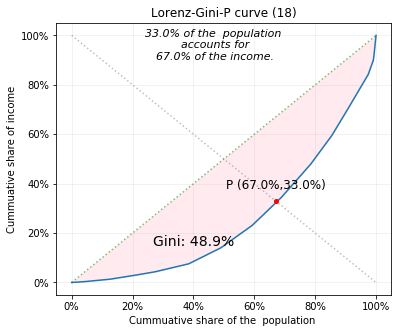

In [7]:
N = 18

# create series with 0 as 1st value:
pops = np.zeros(N)
inc = np.zeros(N)
pops[1:] = np.round(np.random.random(N-1) * 100, 0)
inc[1:] = np.random.random(N-1) * 1000

df = pd.DataFrame({'pops':pops, 'inc':inc})
#proportions
df['pop_pct'] = df.pops / df.pops.sum()
df['inc_pct'] = df.inc / df.inc.sum()

# Add a column for sorting by Income/Population 
df['inc_per_pop'] = df['inc_pct'] / df['pop_pct']
# reset zero row:
df.loc[0] = np.zeros(len(df.columns))

# sort before applying cumsum:
df.sort_values('inc_per_pop', inplace=True)

#Add columns for cumulative shares of x and y
df['cum_pop'] = df.pop_pct.cumsum()/df.pop_pct.sum()
df['cum_inc'] = df.inc_pct.cumsum()/df.inc_pct.sum()

fname = os.path.join(IMG, 'Lorenz_Gini_pandas')

LGP.plot_lorenz_GP(df.cum_pop.values, df.cum_inc.values,
                  save_as=fname)

In [8]:
df.head()

,pops,inc,pop_pct,inc_pct,inc_per_pop,cum_pop,cum_inc
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15,36.0,23.404187,0.040495,0.003051,0.075353,0.040495,0.003051
16,77.0,78.903711,0.086614,0.010287,0.118772,0.127109,0.013339
6,75.0,127.317151,0.084364,0.016599,0.196758,0.211474,0.029938
7,56.0,102.100393,0.062992,0.013312,0.211323,0.274466,0.043250


---